## Analysis of Epinions Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned Epinions sub-dataset that is different from the one in Portfolio 1. 

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### Import Cleaned Epinions Dataset
The csv file named 'Epinions_cleaned_data_portfolio_2.csv'is provided. Please import the csv file (i.e., 'Epinions_cleaned_data_portfolio_2') and print out its total length.

In [7]:
df = pd.read_csv("Desktop/User/JJ/Epinions_cleaned_data_portfolio_2.csv")
df

,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,4.0,4.0,F,Online Stores & Services
1,4259,12000,Shocking!,Sixth Sense,5.0,4.0,F,Movies
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,5.0,4.0,F,Movies
3,4259,12000,Better Than The First!,Toy Story 2,5.0,3.0,F,Movies
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,2.0,4.0,F,Movies
...,...,...,...,...,...,...,...,...
2894,10815,112799,I dare you to sleep through this soon to be cl...,Sleepy Hollow,5.0,4.0,F,Movies
2895,10815,121299,Another movie to keep us out of the water!!!!,Deep Blue Sea,5.0,3.0,F,Movies
2896,10815,121399,Miles above other films.,Green Mile,5.0,4.0,F,Movies
2897,10815,121499,This could be the beginning of a comedy era.,Austin Powers: The Spy Who Shagged Me,3.0,4.0,F,Movies


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column. 
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating (positive or negative). Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [78]:
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,category_code,gender_code,review_code
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,4.0,4.0,F,Online Stores & Services,6,0,856
1,4259,12000,Shocking!,Sixth Sense,5.0,4.0,F,Movies,5,0,1985
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,5.0,4.0,F,Movies,5,0,2006
3,4259,12000,Better Than The First!,Toy Story 2,5.0,3.0,F,Movies,5,0,472
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,2.0,4.0,F,Movies,5,0,493


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2899 non-null   int64  
 1   timestamp    2899 non-null   int64  
 2   review       2899 non-null   object 
 3   item         2899 non-null   object 
 4   rating       2899 non-null   float64
 5   helpfulness  2899 non-null   float64
 6   gender       2899 non-null   object 
 7   category     2899 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 181.3+ KB


In [11]:
from sklearn.preprocessing  import OrdinalEncoder

ord_enc = OrdinalEncoder(dtype = int)
ord_enc

OrdinalEncoder(dtype=<class 'int'>)

In [12]:
df.columns.tolist()

['userId',
 'timestamp',
 'review',
 'item',
 'rating',
 'helpfulness',
 'gender',
 'category']

In [20]:
df["category_code"] = ord_enc.fit_transform(df[["category"]])
df["gender_code"] = ord_enc.fit_transform(df[["gender"]])
df["review_code"] = ord_enc.fit_transform(df[["review"]])
df.columns.tolist()

['userId',
 'timestamp',
 'review',
 'item',
 'rating',
 'helpfulness',
 'gender',
 'category',
 'category_code',
 'gender_code',
 'review_code']

In [34]:
corr_category = df["category_code"].corr(df["rating"])
print("Category & Rating Correlation : " ,corr_category)
corr_gender = df["gender_code"].corr(df["rating"])
print("Gender & Rating Correlation : ",corr_gender)
corr_review = df["review_code"].corr(df["rating"])
print("Review & Rating Correlation : ",corr_review)
corr_helpfulness = df["helpfulness"].corr(df["rating"])
print("Helpfulness & Rating Correlation : ",corr_helpfulness)

Category & Rating Correlation :  -0.14057638180137588
Gender & Rating Correlation :  0.0181050390115076
Review & Rating Correlation :  -0.06207107945825085
Helpfulness & Rating Correlation :  -0.01683220982148863


### Summary : 

1. Rating is more correlated with the category and review

2. Rating is relatively less correlated with the helpfulness and gender

3. Overall, rating is not highly correlated with the four features, as the correlation values are quite small


### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set. 
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data. 
* Print the shape of training and testing sets in the two cases. 

In [ ]:
train_case1,test_case1 = train_test_split(df, test_size = 0.9, random_state = 142)

In [62]:
train_case1.shape

(289, 11)

In [61]:
test_case1.shape

(2610, 11)

In [ ]:
train_case2, test_case2 = train_test_split(df, test_size = 0.1,random_state = 142)

In [38]:
train_case2.shape

(2609, 11)

In [39]:
test_case2.shape

(290, 11)

### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results. 
* To investigate whether feature selection affects the model performance, please select __two most correlated features and two least correlated features__ regarding rating, respectively. 
* Train __four__ linear regression models by following the conditions:
    - (model-a) using the training/testing data in __case 1__ with __two most__ correlated input features
    - (model-b) using the training/testing data in __case 1__ with __two least__ correlated input features
    - (model-c) using the training/testing data in __case 2__ with __two most__ correlated input features
    - (model-d) using the training/testing data in __case 2__ with __two least__ correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [43]:
reg_1M = linear_model.LinearRegression()
reg_1M

X_train_1M = train_case1[["category_code","review_code"]]
y_train_1M = train_case1["rating"]

X_test_1M = test_case1[["category_code","review_code"]]
y_test_1M = test_case1["rating"]

reg_1M.fit(X_train_1M,y_train_1M)

LinearRegression()

In [46]:
reg_1L = linear_model.LinearRegression()
reg_1L

X_train_1L = train_case1[["gender_code","helpfulness"]]
y_train_1L = train_case1["rating"]

X_test_1L = test_case1[["gender_code","helpfulness"]]
y_test_1L = test_case1["rating"]

reg_1L.fit(X_train_1L,y_train_1L)

LinearRegression()

In [54]:
reg_2M = linear_model.LinearRegression()
reg_2M

X_train_2M = train_case2[["category_code","review_code"]]
y_train_2M = train_case2["rating"]

X_test_2M = test_case2[["category_code","review_code"]]
y_test_2M = test_case2["rating"]

reg_2M.fit(X_train_2M,y_train_2M)

LinearRegression()

In [55]:
reg_2L = linear_model.LinearRegression()
reg_2L

X_train_2L = train_case2[["gender_code","helpfulness"]]
y_train_2L = train_case2["rating"]

X_test_2L = test_case2[["gender_code","helpfulness"]]
y_test_2L = test_case2["rating"]

reg_2L.fit(X_train_2L,y_train_2L)

LinearRegression()

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [57]:
predicted_1M = reg_1M.predict(X_test_1M)
predicted_1M

mse_1M = mean_squared_error(predicted_1M, y_test_1M)
rmse_1M = np.sqrt(mse_1M)

print("Reg_1M MSE:", mse_1M)
print("Reg_1M Root MSE:", rmse_1M)

Reg_1M MSE: 1.7661060021271924
Reg_1M Root MSE: 1.3289492097620557


In [58]:
predicted_1L = reg_1L.predict(X_test_1L)
predicted_1L

mse_1L = mean_squared_error(predicted_1L, y_test_1L)
rmse_1L = np.sqrt(mse_1L)

print("Reg_1L MSE:", mse_1L)
print("Reg_1L Root MSE:", rmse_1L)

Reg_1L MSE: 1.8142164061736321
Reg_1L Root MSE: 1.3469285081895148


In [59]:
predicted_2M = reg_2M.predict(X_test_2M)
predicted_2M

mse_2M = mean_squared_error(predicted_2M, y_test_2M)
rmse_2M = np.sqrt(mse_2M)

print("Reg_2M MSE:", mse_2M)
print("Reg_2M Root MSE:", rmse_2M)

Reg_2M MSE: 1.6761619414799571
Reg_2M Root MSE: 1.2946667298884131


In [60]:
predicted_2L = reg_2L.predict(X_test_2L)
predicted_2L

mse_2L = mean_squared_error(predicted_2L, y_test_2L)
rmse_2L = np.sqrt(mse_2L)

print("Reg_2L MSE:", mse_2L)
print("Reg_2L Root MSE:", rmse_2L)

Reg_2L MSE: 1.7684952380582883
Reg_2L Root MSE: 1.3298478251507908


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [66]:
df_mse = pd.DataFrame({"mse":[mse_1M,mse_1L,mse_2M,mse_2L]},index = ["reg_1M","reg_1L","reg_2M","reg_2L"])
df_mse

,mse
reg_1M,1.766106
reg_1L,1.814216
reg_2M,1.676162
reg_2L,1.768495


<BarContainer object of 4 artists>

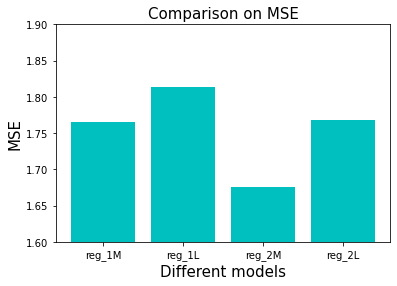

In [71]:
plt.ylim(1.6,1.9)
plt.xlabel("Different models" , size = 15)
plt.ylabel("MSE", size = 15)
plt.title("Comparison on MSE", size = 15)

plt.bar(data = df_mse,
        height = "mse",
        x = ["reg_1M","reg_1L","reg_2M","reg_2L"],
        color = "c")

## Analysis
* reg_1M < reg_1L indicates that more correlated input features  help generate better models (result)
* reg_1M > reg_2M indicates that more training leads to better predictions(models)

In [72]:
df_rmse = pd.DataFrame({"rmse":[rmse_1M,rmse_1L,rmse_2M,rmse_2L]},index = ["reg_1M","reg_1L","reg_2M","reg_2L"])
df_rmse

,rmse
reg_1M,1.328949
reg_1L,1.346929
reg_2M,1.294667
reg_2L,1.329848


<BarContainer object of 4 artists>

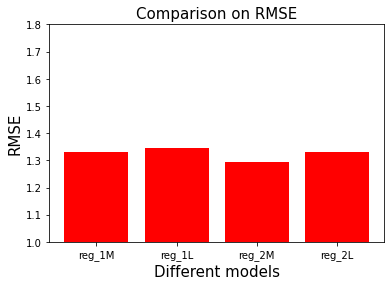

In [77]:
plt.ylim(1.0,1.8)
plt.xlabel("Different models" , size = 15)
plt.ylabel("RMSE", size = 15)
plt.title("Comparison on RMSE", size = 15)

plt.bar(data = df_rmse,
        height = "rmse",
        x = ["reg_1M","reg_1L","reg_2M","reg_2L"],
        color = "red")

## Analysis
* reg_1M < reg_1L indicates that more correlated input features  help generate better models (result)
* reg_1M > reg_2M indicates that more training leads to better predictions
* Also we can see that there is not much deviation in all the box plots i.e, the test data containing 10% of total data has relativelty similar values